In [1]:
import pandas as pd


def get_stratified_subset(df, label_column, num_examples_per_label, random_state=None):
    """
    Returns a stratified subset of the dataframe with a fixed number of examples for each label.

    Args:
        df (pd.DataFrame): The input dataframe.
        label_column (str): The name of the column containing the labels.
        num_examples_per_label (int): The fixed number of examples to sample for each label.
        random_state (int, optional): Random seed for reproducibility.

    Returns:
        pd.DataFrame: A stratified subset of the dataframe.
    """
    if random_state is not None:
        np.random.seed(random_state)

    stratified_subset = []

    for label in df[label_column].unique():
        label_group = df[df[label_column] == label]
        if len(label_group) < num_examples_per_label:
            raise ValueError(f"Not enough examples for label '{label}'. Requested {num_examples_per_label}, but only {len(label_group)} available.")
        
        sampled_group = label_group.sample(n=num_examples_per_label, random_state=random_state)
        stratified_subset.append(sampled_group)

    return pd.concat(stratified_subset).reset_index(drop=True)
def concatenate_dataframes(dfs):
    """
    Concatenates a list of DataFrames based on the 'filename' column as the ID.
    Drops the 'Prediction' column from each DataFrame and returns all column names except 'filename'.

    Parameters:
        dfs (list): List of pandas DataFrames to concatenate. Each must have a 'filename' column.

    Returns:
        pd.DataFrame: A single DataFrame with merged data.
        list: List of all column names excluding 'filename'.
    """
    if not dfs:
        raise ValueError("The list of DataFrames is empty.")

    for df in dfs:
        if 'Filename' not in df.columns:
            raise ValueError("Each DataFrame must contain a 'filename' column.")

    # Drop 'Prediction' column from each DataFrame if it exists
    dfs = [df.drop(columns=['Prediction'], errors='ignore') for df in dfs]

    # Start with the first DataFrame
    result = dfs[0].copy()
    
    for idx, df in enumerate(dfs[1:], start=1):
        # Rename columns to add a suffix except for 'filename'
        renamed_df = df.rename(columns={col: f"{col}_exp{idx}" for col in df.columns if col != 'Filename'})
        
        # Merge with the existing result
        result = pd.merge(result, renamed_df, on='Filename', how='outer')

    # Get all column names except 'filename'
    column_names = [col for col in result.columns if col != 'Filename']

    return result, column_names

In [2]:
import pandas as pd
import numpy as np

In [884]:
experiments_list = [
    'multimodalmodel_w2v2xls2b_robertalarge_lazyload_lr1e4_head1',
    'multimodalmodel_hubertxlarge_robertalarge_lazyload_lr1e4_head1',
    'multimodalmodel_whisperlarge_robertalarge_lazyload_lr1e4_1head',
    'multimodalmodel_wavlmlarge_robertalarge_lazyload_lr1e4_head1',
    'multimodalmodel_w2v2robust_robertalarge_lazyload_lr1e4_head1',
    "multimodalmodel_whisperlarge_debertaxxlarge_lazyload_lr1e5_lasthidden_head1",
    "multimodalmodel_whisperlarge_hubertxlarge_lazyload_lr1e4_head1",
    "multimodalmodel_whisperlarge_robertalarge_ns3_lazyload_lr1e5_focaloss",
    "multimodalmodel_whisperlarge_robertalarge_lazyload_lr1e4_1head_prodosyembs",
    # "multimodalmodel_whisperlarge_robertalarge_lazyload_lr1e4_1head_focalloss"
]

dfs = []
dfs_val = []
for exp in experiments_list:
    dfs.append(pd.read_csv(f'../experiments/{exp}/results/train.csv'))
    dfs_val.append(pd.read_csv(f'../experiments/{exp}/results/dev.csv'))
# preds.head()

In [885]:
preds, cols = concatenate_dataframes(dfs)
preds_val, _ = concatenate_dataframes(dfs_val)

In [886]:
preds.head()

,Filename,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,class_0_prob_exp1,...,class_6_prob_exp7,class_7_prob_exp7,class_0_prob_exp8,class_1_prob_exp8,class_2_prob_exp8,class_3_prob_exp8,class_4_prob_exp8,class_5_prob_exp8,class_6_prob_exp8,class_7_prob_exp8
0,MSP-PODCAST_0005_0110.wav,0.0467,-1.3908,-1.9270,-0.1232,-0.4376,1.3934,2.4141,-0.0260,0.6495,...,1.4607,2.0207,1.0946,-1.9560,-1.3234,-0.6866,-1.1105,1.4452,2.1301,0.5559
1,MSP-PODCAST_0023_0064.wav,-1.8494,-0.4594,-0.1003,-0.5324,-0.8848,0.0798,2.1872,0.9556,-1.1495,...,0.2791,1.0785,0.6473,-0.6389,0.2834,0.4786,-1.0754,-0.4096,1.2843,0.7205
2,MSP-PODCAST_0023_0179.wav,-0.5292,-0.5492,-0.5473,-0.7944,0.3030,-0.3077,1.2879,0.8922,-0.5645,...,1.1263,2.0729,-0.1283,-2.1069,0.5667,-0.5530,0.3578,-1.1167,0.7592,1.7037
3,MSP-PODCAST_0023_0320.wav,-0.3186,0.0905,-1.6711,0.1705,-2.4125,1.4789,1.8924,0.4987,-0.3674,...,1.0105,1.7775,0.1318,0.0356,-0.7884,0.0125,-2.3123,0.8764,1.5435,0.6231
4,MSP-PODCAST_0023_0386.wav,-0.7226,-0.3260,-0.9338,0.4871,0.0017,0.4451,1.3037,0.3800,0.1489,...,0.7511,1.8008,0.5572,-1.2089,-0.9598,-0.0469,0.3320,-0.1550,0.9251,0.6003


In [887]:
classes_ = ['A', 'S', 'H', 'U', 'F', 'D', 'C', 'N']

map_idx = dict()
for i, c in enumerate(classes_):
    map_idx[c] = i

map_argmax = dict()
for i, c in enumerate(classes_):
    map_argmax[i] = c

In [888]:
df = pd.read_csv('/workspace/lucas.ueda/interspeech_ser/data/Labels/labels_consensus.csv')
df.head()

,FileName,EmoClass,EmoAct,EmoVal,EmoDom,SpkrID,Gender,Split_Set
0,MSP-PODCAST_0002_0033.wav,N,4.8,4.2,5.4,127,Female,Development
1,MSP-PODCAST_0002_0039.wav,N,4.0,4.2,4.2,127,Female,Development
2,MSP-PODCAST_0002_0051.wav,N,4.0,4.2,4.2,127,Female,Development
3,MSP-PODCAST_0002_0059.wav,X,4.0,3.8,4.0,128,Female,Development
4,MSP-PODCAST_0002_0061.wav,F,3.4,2.8,4.2,128,Female,Development


In [889]:
# Just saving the auxiliardataset

In [890]:
preds['FileName'] = preds['Filename']
preds = preds.merge(df[['FileName','EmoClass','Gender','SpkrID']], how='left', on = 'FileName')

preds_val['FileName'] = preds_val['Filename']
preds_val = preds_val.merge(df[['FileName','EmoClass','Gender','SpkrID']], how='left', on = 'FileName')

In [891]:
preds['target'] = preds['EmoClass'].map(map_idx)
preds_val['target'] = preds_val['EmoClass'].map(map_idx)

In [892]:
preds.head()

,Filename,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,class_0_prob_exp1,...,class_3_prob_exp8,class_4_prob_exp8,class_5_prob_exp8,class_6_prob_exp8,class_7_prob_exp8,FileName,EmoClass,Gender,SpkrID,target
0,MSP-PODCAST_0005_0110.wav,0.0467,-1.3908,-1.9270,-0.1232,-0.4376,1.3934,2.4141,-0.0260,0.6495,...,-0.6866,-1.1105,1.4452,2.1301,0.5559,MSP-PODCAST_0005_0110.wav,H,Male,85,2
1,MSP-PODCAST_0023_0064.wav,-1.8494,-0.4594,-0.1003,-0.5324,-0.8848,0.0798,2.1872,0.9556,-1.1495,...,0.4786,-1.0754,-0.4096,1.2843,0.7205,MSP-PODCAST_0023_0064.wav,H,Male,1,2
2,MSP-PODCAST_0023_0179.wav,-0.5292,-0.5492,-0.5473,-0.7944,0.3030,-0.3077,1.2879,0.8922,-0.5645,...,-0.5530,0.3578,-1.1167,0.7592,1.7037,MSP-PODCAST_0023_0179.wav,F,Male,1,4
3,MSP-PODCAST_0023_0320.wav,-0.3186,0.0905,-1.6711,0.1705,-2.4125,1.4789,1.8924,0.4987,-0.3674,...,0.0125,-2.3123,0.8764,1.5435,0.6231,MSP-PODCAST_0023_0320.wav,A,Male,1,0
4,MSP-PODCAST_0023_0386.wav,-0.7226,-0.3260,-0.9338,0.4871,0.0017,0.4451,1.3037,0.3800,0.1489,...,-0.0469,0.3320,-0.1550,0.9251,0.6003,MSP-PODCAST_0023_0386.wav,F,Male,163,4


In [893]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [894]:
preds_estrat = get_stratified_subset(preds, 'EmoClass', 300, random_state=42)

In [895]:
# preds_estrat

In [896]:
# # Just saving the auxiliardataset
# filenames = preds_estrat.FileName

# tmp = pd.read_csv("../benchmark/processed_labels.csv")

In [897]:
# tmp = tmp[tmp['FileName'].isin(filenames)].reset_index(drop=True)
# tmp.shape

In [898]:
# tmp.to_csv("train_stacking_sample.csv")

In [899]:
# tmp.head()

In [900]:
preds_estrat.EmoClass.value_counts()

EmoClass
H    300
F    300
A    300
C    300
N    300
D    300
S    300
U    300
Name: count, dtype: int64

In [901]:
preds_estrat.Gender.value_counts()

Gender
Male      1375
Female    1025
Name: count, dtype: int64

In [902]:
# lr = LogisticRegression(random_state = 42, max_iter = 500, C=1,  multi_class='ovr', penalty='l2')
lr = RandomForestClassifier(random_state = 42, n_estimators = 500, max_depth = 8, criterion="gini", min_samples_leaf=10, min_samples_split=10)

# lr = SVC(random_state = 42, C = 0.8, kernel='rbf', gamma = 'scale', probability=True)

# preds_estrat = get_stratified_subset(preds, 'EmoClass', 300, random_state=42)

lr.fit(preds_estrat[cols], preds_estrat['target'])

RandomForestClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=500, random_state=42)

In [903]:
preds_val['Prediction'] = lr.predict(preds_val[cols])
preds_val['Prediction'] = preds_val['Prediction'].map(map_argmax) 

preds_estrat['Prediction'] = lr.predict(preds_estrat[cols])
preds_estrat['Prediction'] = preds_estrat['Prediction'].map(map_argmax) 

In [904]:
preds_val.head()

,Filename,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,class_0_prob_exp1,...,class_4_prob_exp8,class_5_prob_exp8,class_6_prob_exp8,class_7_prob_exp8,FileName,EmoClass,Gender,SpkrID,target,Prediction
0,MSP-PODCAST_0002_0033.wav,-0.5309,-0.2458,0.3321,0.8860,0.2190,-0.6096,0.0435,0.5484,-1.5255,...,0.7078,-0.9036,0.4199,1.0076,MSP-PODCAST_0002_0033.wav,N,Female,127,7,F
1,MSP-PODCAST_0002_0039.wav,-0.4002,-0.8329,0.6057,0.5029,0.6050,-1.3757,-0.1083,0.6480,-1.1414,...,0.5768,-0.7358,0.0089,0.8371,MSP-PODCAST_0002_0039.wav,N,Female,127,7,F
2,MSP-PODCAST_0002_0051.wav,-1.2119,0.0838,0.2217,0.1194,-0.0451,-0.4760,0.5950,1.0839,-0.6628,...,-0.8625,-0.1062,0.5062,1.5619,MSP-PODCAST_0002_0051.wav,N,Female,127,7,N
3,MSP-PODCAST_0002_0061.wav,-0.4291,-0.8196,-0.2584,0.2270,-0.9395,0.2972,1.5520,0.2986,-1.1753,...,-0.2397,-0.5744,1.0043,0.7046,MSP-PODCAST_0002_0061.wav,F,Female,128,4,C
4,MSP-PODCAST_0006_0017.wav,-1.6810,0.9330,0.1571,0.2959,1.0096,-0.9140,0.1110,0.5220,-1.9912,...,-0.8336,-1.2238,0.3821,1.8402,MSP-PODCAST_0006_0017.wav,N,Female,127,7,F


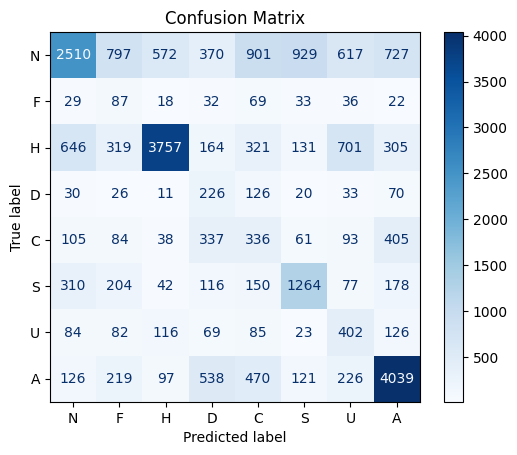

In [905]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(preds_val['EmoClass'], preds_val['Prediction'], labels=preds_val['EmoClass'].unique())

# Display labels
labels = preds_val['EmoClass'].unique()

# Visualize confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [906]:
preds_subset = get_stratified_subset(preds_val, 'EmoClass', 100)
preds_subset.head()

,Filename,class_0_prob,class_1_prob,class_2_prob,class_3_prob,class_4_prob,class_5_prob,class_6_prob,class_7_prob,class_0_prob_exp1,...,class_4_prob_exp8,class_5_prob_exp8,class_6_prob_exp8,class_7_prob_exp8,FileName,EmoClass,Gender,SpkrID,target,Prediction
0,MSP-PODCAST_0853_0125_0003.wav,-1.4479,1.7724,-0.3607,-0.9374,-0.2611,0.1889,0.5564,0.7301,-2.1565,...,-0.7434,-1.4322,0.1265,1.5864,MSP-PODCAST_0853_0125_0003.wav,N,Female,315,7,N
1,MSP-PODCAST_2347_2231.wav,5.0176,-0.8506,-1.5576,-1.4409,-0.8567,-1.4710,-0.1027,-1.7864,0.7059,...,-1.1780,-0.1778,0.7787,-1.4614,MSP-PODCAST_2347_2231.wav,N,Female,210,7,F
2,MSP-PODCAST_0103_0626.wav,-1.2552,-0.3036,0.1058,0.0217,0.1933,-0.1856,0.7349,0.4243,-1.9114,...,-0.9337,-1.7016,0.4773,2.4464,MSP-PODCAST_0103_0626.wav,N,Male,274,7,N
3,MSP-PODCAST_3231_0703.wav,-1.8362,-0.4945,1.7949,1.3573,-0.2529,-1.7019,0.1994,1.2670,-1.9972,...,0.1467,-1.9840,-0.4464,1.3185,MSP-PODCAST_3231_0703.wav,N,Male,2051,7,H
4,MSP-PODCAST_4235_0054_0001.wav,0.0131,-0.5713,0.0677,0.0430,-0.9245,-0.6496,0.4895,0.5331,-0.4203,...,-1.4251,-0.8775,0.9915,1.2182,MSP-PODCAST_4235_0054_0001.wav,N,Female,1905,7,C


# Training bootstrap

In [907]:
# Average F1-score using bootstrap
f1_scores = []
for i in range(100):
    preds_subset = get_stratified_subset(preds_estrat, 'EmoClass', 100, i)
    f1_scores.append(f1_score(preds_estrat['EmoClass'], preds_estrat['Prediction'], average='macro'))

In [908]:
f1_scores = np.array(f1_scores)

np.mean(f1_scores), np.std(f1_scores),np.max(f1_scores),np.min(f1_scores)

(0.6838807145170149, 0.0, 0.6838807145170149, 0.6838807145170149)

In [909]:
f1_score(preds_estrat['EmoClass'], preds_estrat['Prediction'], average='macro')

0.6838807145170149

In [910]:
accuracy_score(preds_estrat['EmoClass'], preds_estrat['Prediction'])

0.6829166666666666

# Dev bootstrap

In [911]:
# Average F1-score using bootstrap
f1_scores = []
for i in range(100):
    preds_subset = get_stratified_subset(preds_val, 'EmoClass', 200, i)
    f1_scores.append(f1_score(preds_subset['EmoClass'], preds_subset['Prediction'], average='macro'))

In [912]:
# f1_scores

In [913]:
f1_scores = np.array(f1_scores)

np.mean(f1_scores), np.std(f1_scores),np.max(f1_scores),np.min(f1_scores)

(0.430157490491377,
 0.008774718727817526,
 0.4482011713287406,
 0.3997044761094807)

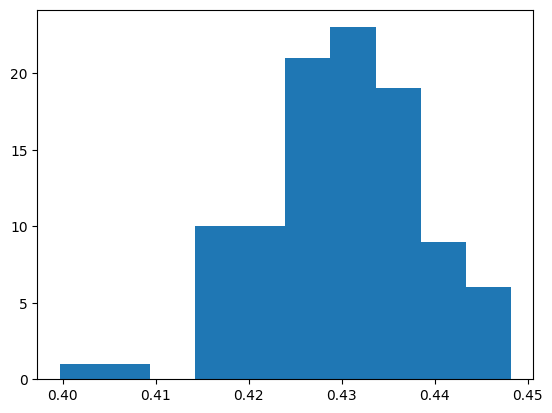

In [914]:
plt.hist(f1_scores, bins=10)
plt.show()

In [915]:
f1_score(preds_val['EmoClass'], preds_val['Prediction'], average='macro')

0.3784452640563067

In [874]:
f1_score(preds_val['EmoClass'], preds_val['Prediction'], average='micro')

0.49695146092327186

In [875]:
accuracy_score(preds_val['EmoClass'], preds_val['Prediction'])

0.49695146092327186

In [876]:
f1_score(preds_val[preds_val['Gender']=='Female']['EmoClass'], preds_val[preds_val['Gender']=='Female']['Prediction'], average='macro')

0.3511860372733772

In [877]:
f1_score(preds_val[preds_val['Gender']=='Male']['EmoClass'], preds_val[preds_val['Gender']=='Male']['Prediction'], average='macro')

0.39619173467443025

In [878]:
accuracy_score(preds_val[preds_val['Gender']=='Female']['EmoClass'], preds_val[preds_val['Gender']=='Female']['Prediction'])

0.4360168746704166

In [879]:
accuracy_score(preds_val[preds_val['Gender']=='Male']['EmoClass'], preds_val[preds_val['Gender']=='Male']['Prediction'])

0.5469020172910662

In [880]:
for e in preds['EmoClass'].unique():
    acc = accuracy_score(preds_val[preds_val['EmoClass']==e]['EmoClass'], preds_val[preds_val['EmoClass']==e]['Prediction'])
    print(f'Emotion {e} acc = {acc}')

Emotion H acc = 0.5925283732660782
Emotion F acc = 0.2822085889570552
Emotion A acc = 0.6936257710760795
Emotion C acc = 0.22823851953392735
Emotion N acc = 0.32668732318469623
Emotion D acc = 0.4280442804428044
Emotion S acc = 0.5373771892353695
Emotion U acc = 0.41033434650455924


In [881]:
preds_val.EmoClass.value_counts()

EmoClass
N    7423
H    6344
A    5836
S    2341
C    1459
U     987
D     542
F     326
Name: count, dtype: int64

In [882]:
preds_val.Prediction.value_counts(normalize=True)

Prediction
A    0.234104
H    0.183981
N    0.147280
S    0.102700
C    0.094861
U    0.088170
F    0.076926
D    0.071977
Name: proportion, dtype: float64

In [883]:
import joblib

# Save to a file
joblib.dump(lr, '../submissions/rf_model_stackingv2_augmented.pkl')

['../submissions/rf_model_stackingv2_augmented.pkl']